# Linear Regression

There are several factors that can influence a student's performance on a test, but for the sake of this analogy, let's consider the number of hours spent studying as a key determinant. In this scenario, the student's performance on the test is the 'dependent' variable, which is influenced by the 'independent' variable of hours studied.

For instance, if student one achieved a perfect score of 100% after dedicating 10 hours to studying, and student two attained a score of 50% after studying for 5 hours, what might student three score after studying for 7 hours? If you guessed 70%, you're correct.

In the language of data analysis, predicting the outcome of one variable based on another is termed linear regression analysis.

The linear regression formula is represented as:

## \[ y = mx + b \]

Where:
- \( y \) is the dependent variable,
- \( x \) is the independent variable,
- \( m \) is the slope of the regression line, and
- \( b \) is the y-intercept.

In the formula described above, we introduce two new constants: m and b. Let's begin with m, it represents the slope of the regression line, indicating the rate at which the student's score changes with respect to the number of hours studied (dy/dx).

Now, imagine a situation where class attendance contributes to 10% of the overall score. In this context, even if a student dedicates no time to studying, they would still achieve a score of 10% provided they attended all classes. This 10% value serves as the y-intercept(b).


## Question

Let's revisit the initial scenario with the student data and discuss how we can mathematically determine the values of m, b, and y using a set of data points.

| Student | Study Hour | Score |
| ------- | ---------- | ----- |
| S1      | 10         | 100   |
| S2      | 5          | 50    |
| S3      | 7          | y     |

Find the values of m, b and y.

## Solution

Prerequisite
- Linear Algebra: Systems of Linear Equations

### Formula
y = mx + b

### Step 1
Substitute values of y and x for s1 and s2 in the formula above to have a system of linear equations

100 = 10m + b ........... eq. 1

50 = 5m + b ............. eq. 2

### Step 3
Substract eq.2 from eq.1

50 = 5m

### Step 4
Divide both sides by 5

m = 10

### Step 5
b = 0 or more conveniently substitute the value of m in either eq.1 or eq.2

eq.1 : 100 - 10(10) = b

b = 0

### Step 6
solve for y for student 3

y = 10(7) + 0

y = 70

## Handling Larger Datasets

The previous example provided a straightforward illustration. However, as datasets grow in size, such as with 10,000 rows of data, simple calculations of m and b using just two values of x and y may not yield accurate results. In such cases, we need more sophisticated techniques like regression lines, cost or error functions, and perhaps even gradient descent optimization.

Let's consider a new dataset to delve deeper into this complexity.

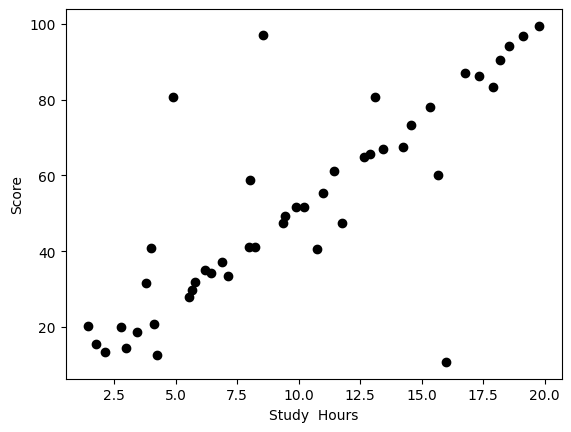

In [7]:
# import necessary modules

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# read the new dataset using pd.read_csv(path_to_csv)
df = pd.read_csv('data/test_score.csv')

# assign columns in data to variables x and y
x = df['Study Hours']
y = df['Score']

# plot x and y for better visualization
plt.scatter(x, y, color='black')
plt.xlabel('Study  Hours')
plt.ylabel('Score')
plt.show()

The plot above illustrates the correlation between study hours and scores, demonstrating a clear positive relationship where an increase in study hours corresponds to higher scores. This positive correlation is evident in the positive gradient of the trend line.

However, it's essential to notice three data points that significantly deviate from the majority of the data. These outliers are observations that lie far from the main cluster of points. Outliers can occur due to various reasons such as measurement errors, data entry mistakes, or genuinely exceptional cases within the dataset.

## Regression Line

In simple terms, a regression line represents the "best-fit" straight line through a set of data points. It's a line that minimizes the overall distance between itself and the data points. This line helps us understand and quantify the relationship between two variables.

Hence, in linear regression the aim is to find the line that best fits the datapoints.

### Finding the regression line 

To find the regression line, let us start by randomly initializing values for m and b and using it to calculate the value of y_new. 

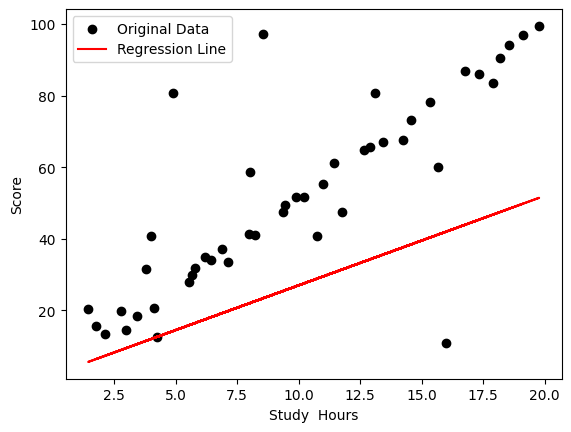

In [13]:
# slope of the linear function
m = 2.5
# y intercept
b = 2

y_new = m * x + b

plt.scatter(x, y, color='black', label='Original Data')
# Plot the new line
plt.plot(x, y_new, color='red', label='Regression Line')
plt.xlabel('Study  Hours')
plt.ylabel('Score')
plt.legend()
plt.show()

In [14]:
def mse_lin(n, y, y_new):
    """
    Calculates the Mean Squared Error
    
    Args:
        n is the number of data points
        y is the actual values of the dependent variable
        y_new is the predicted values of y
        
    Returns:
        Mean Squared Error"""
    
    summation = 0

    for i in range(n):
        summation += y[i] - y_new[i]

    mse = 1/n * summation    
    
    return mse

# n is the number of data points
n = len(x)

print(mse_lin(n, y, y_new))

24.91815217391305



From our calculation using the Mean Squared Error (MSE) function, we obtained a value of 24.91815217391305. This figure underscores the margin of error in our model's predictions when compared to the actual observed values in the dataset.

Our primary objective is to minimize this margin of error. By reducing the MSE, we aim to improve the accuracy of our model's predictions. A lower MSE indicates that our model is performing better at capturing the relationship between the input variables (study hours) and the output variable (scores).

## Gradient Descent in Linear Regression



In [15]:
L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

# Performing Gradient Descent 
for i in range(epochs): 
    y_new = m * x + b  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - y_new))  # Derivative wrt m
    D_b = (-2/n) * sum(y - y_new)  # Derivative wrt c
    m = m - L * D_m  # Update m
    b = b - L * D_b  # Update c
    
print (m, b)

4.749719372372382 2.631108465883542


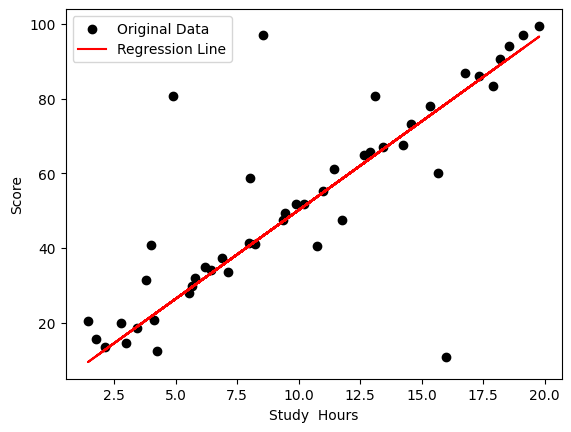

In [16]:
y_model = m * x + b

plt.scatter(x, y, color='black', label='Original Data')
# Plot the new line
plt.plot(x, y_model, color='red', label='Regression Line')
plt.xlabel('Study  Hours')
plt.ylabel('Score')
plt.legend()
plt.show()